# Problem 1

In [1]:
# define derivative function
def f(x):
    return 2*x+6

In [2]:
x_start = 2
rate = 0.1
change = 0.00001
step = 1
iterationMax = 1000
i = 0
while step > change and i < iterationMax: # maximum loop is 1000, if the step change less than 0.00001 will stop
    i+=1 # count the loop
    newX = x_start - rate*f(x_start) # calculate the new x
    step = abs(newX - x_start) # step change
    x_start = newX 
print(f"The local minimum is {round(x_start**2 + 6*x_start,2)} when x equals {round(x_start,2)}")
print('I got the exact same answer with previous part')

The local minimum is -9.0 when x equals -3.0
I got the exact same answer with previous part


# Problem 2

In [3]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
import statistics
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("ORing.csv") # import data

### Question 1

Normalize the launch temperature

In [5]:
x = (df['Temp'] - df['Temp'].mean())/df['Temp'].std() # normalization
print(f'Normalized Temp \n{x}')
x = np.array(x).reshape(-1,1) # assign IV as x
y = np.array(df.iloc[:,1]).reshape(-1,1) # assign DV as y
one = np.ones(x.shape) # create one column with one for bias
# combine one and IV
x = np.hstack([one,x]) # (24,2)
# create w for our parameter
w = np.array([[1],[1]]) # (2,1)

Normalized Temp 
0    -2.293007
1    -1.886366
2    -1.750818
3    -0.937535
4    -0.530893
5    -0.395346
6    -0.395346
7    -0.395346
8    -0.259799
9    -0.124252
10    0.011296
11    0.011296
12    0.011296
13    0.011296
14    0.282390
15    0.417937
16    0.689032
17    0.689032
18    0.824579
19    0.824579
20    1.095673
21    1.231221
22    1.366768
23    1.502315
Name: Temp, dtype: float64


### Question 2

Create a logistic regression model using the gradiant decent technique

In [6]:
# define a function for Hypothesis
def my_function(x):
    return 1 / (1 + np.exp(-x))

In [7]:
change = 0.00001 # we want our change less than 0.00001
run = 1000 # maximum time of iteration is 1000
time = 0 # time is to count how many times we have run
dif = 1 # assign difference between two w is one
rate = 0.1 # this is our step size
while time < run and dif > change:
    time+=1 # counter plus one
    # prediction value
    h = my_function(np.matmul(x, w)) # (24,1)
    # gradiant function
    gradiant = np.matmul(x.T, h - y) # (2,24) * (24,1) = (2,1)
    # get new parameter
    wnew = w - rate * gradiant
    # find out the difference
    dif = LA.norm(abs(wnew - w))
    # assign new parameter to w
    w = wnew
print(f"Final parameter we get is {w}")
print(time)

Final parameter we get is [[-1.10279169]
 [-1.26389   ]]
40


In [9]:
h.shape

(24, 1)

In [11]:
gradiant.shape

(2, 1)

In [10]:
w

array([[-1.10279169],
       [-1.26389   ]])

In [8]:
# use our findings to make prediction
h = my_function(np.matmul(x, w))

Equation: 

$h = \frac{1}{1 + e^{-1.10279169 + -1.26389x}}$

### Question 3

Plot of original data along with logistic model

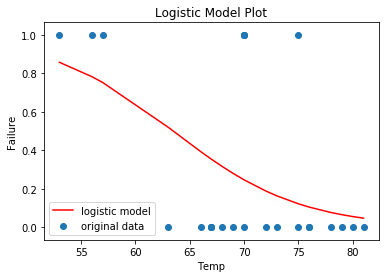

In [9]:
plt.scatter(df['Temp'], df['Failure'], label = 'original data')
plt.plot(df['Temp'], my_function(np.matmul(x, w)), color = 'red', label = 'logistic model')
plt.title('Logistic Model Plot')
plt.xlabel('Temp')
plt.ylabel('Failure')
plt.legend()
plt.show()

### Question 4

Make prediction

In [12]:
temperature = (31 - df['Temp'].mean())/df['Temp'].std()

In [13]:
temperature

-5.2750465534221895

In [15]:
question = np.array([[1],[temperature]]).reshape(1,2)

In [16]:
question

array([[ 1.        , -5.27504655]])

In [17]:
h = my_function(np.matmul(question, w))
question4 = [1 if result > 0.5 else 0 for result in h]

In [18]:
h

array([[0.99618232]])

In [13]:
print(f"The prediction for question4 is {question4[0]}")

The prediction for question4 is 1


Our prediction for 31 degrees Fahrenheit is 1.

Because we only have few data to build our model, this is not a good model for NASA to use. Our desired model should be based on a lot of data, we want a really tall matrix.